In [1]:
!pip install pygrib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 30.6 MB/s eta 0:00:00


In [3]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 74.7 MB/s eta 0:00:00


In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pygrib

In [42]:
ds = xr.open_dataset('/content/data_stream-oper_stepType-instant.nc')

In [43]:
ds.head()

<xarray.Dataset> Size: 2kB
Dimensions:     (valid_time: 5, latitude: 5, longitude: 5)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 40B 2024-12-31 ... 2024-12-31T04:...
  * latitude    (latitude) float64 40B 38.0 37.75 37.5 37.25 37.0
  * longitude   (longitude) float64 40B 68.0 68.25 68.5 68.75 69.0
    expver      (valid_time) <U4 80B ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 500B ...
    v10         (valid_time, latitude, longitude) float32 500B ...
    d2m         (valid_time, latitude, longitude) float32 500B ...
    t2m         (valid_time, latitude, longitude) float32 500B ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-20T07:15 GRIB to CDM+CF via cfgrib-0.9.1...

In [44]:
desired_date = '2024-12-02T23:00:00.000000000'

In [46]:
data_for_desired_date = ds.sel(valid_time=desired_date,method='nearest')
print(data_for_desired_date)

<xarray.Dataset> Size: 243kB
Dimensions:     (latitude: 129, longitude: 117)
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2024-12-31
  * latitude    (latitude) float64 1kB 38.0 37.75 37.5 37.25 ... 6.5 6.25 6.0
  * longitude   (longitude) float64 936B 68.0 68.25 68.5 ... 96.5 96.75 97.0
    expver      <U4 16B ...
Data variables:
    u10         (latitude, longitude) float32 60kB ...
    v10         (latitude, longitude) float32 60kB ...
    d2m         (latitude, longitude) float32 60kB ...
    t2m         (latitude, longitude) float32 60kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-20T07:15 GRIB to CDM+CF via cfgrib-0.9.1...


In [38]:
import geopandas as gpd

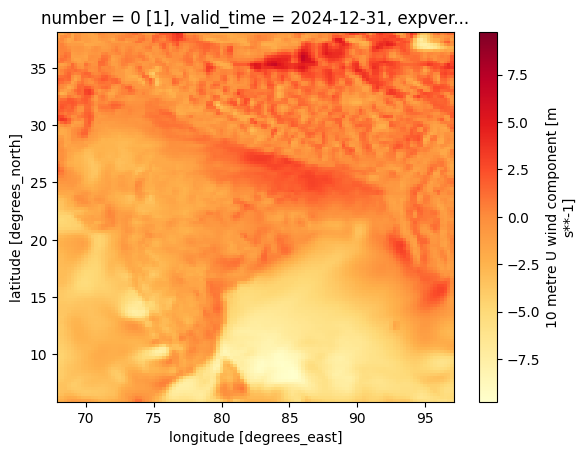

In [47]:
(data_for_desired_date['u10']).plot(cmap='YlOrRd')

In [53]:
df = ds[['v10','u10','d2m','t2m']].to_dataframe()

In [55]:
df.to_csv('data.csv')

In [8]:
print(ds['v10'].values)

[[[-3.510788   -3.3711395  -3.262741   ... -0.29008484 -0.5830536
   -0.8330536 ]
  [-3.6162567  -3.501999   -3.3535614  ... -0.11820984 -0.37309265
   -0.61528015]
  [-3.7061005  -3.582077   -3.4277802  ... -0.04594421 -0.29008484
   -0.5312958 ]
  ...
  [        nan         nan         nan ... -1.8818817  -1.7402802
   -1.5791473 ]
  [        nan         nan         nan ... -1.9385223  -1.7959442
   -1.6523895 ]
  [        nan         nan         nan ... -1.9023895  -1.7598114
   -1.6260223 ]]

 [[-4.5672665  -4.37586    -4.280157   ...  0.10460854 -0.23718834
   -0.5565243 ]
  [-4.6453915  -4.496954   -4.291876   ...  0.11730385 -0.20789146
   -0.5194149 ]
  [-4.733282   -4.564337   -4.345587   ...  0.10265541 -0.21668053
   -0.5272274 ]
  ...
  [        nan         nan         nan ... -0.98914146 -0.84070396
   -0.6629696 ]
  [        nan         nan         nan ... -0.89832115 -0.7508602
   -0.5946102 ]
  [        nan         nan         nan ... -0.83093834 -0.6815243
   -0.549688

In [14]:
ds['v10'].isnull()

<xarray.DataArray 'v10' (valid_time: 31, latitude: 71, longitude: 61)> Size: 134kB
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]]])
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 248B 2024-12-01T23:00:00 ... 2024...
  * latitude    (latitude) float64 568B 27.0 26.9 26.8 26.7 ... 20.2 20.1 20.0
  * longitude   (longitude) float64 488B 69.0 69.1 69.2 69.3 ... 74.8 74.9 75.0
    expver      (valid_time) <U4 496B ...